<a href="https://colab.research.google.com/github/omidghavibazoo/demo-repo2/blob/master/DeltaRRBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of the impact of discontinued Real Return Bonds (RRBs) on nominal bond yields.
---
#### Omid Ghavibazoo, Research Associate, Global Risk Institute



# Importing Data

In [1]:
# Import Packages
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install -c conda-forge pmdarima -y

In [4]:
# Import the Excel file
from google.colab import files
uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


In [ ]:
# Extract the sheet of yields
df = pd.read_excel('Data.xlsx', sheet_name='Cleaned')
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail()) # Print the first few rows of the DataFrame to verify import.

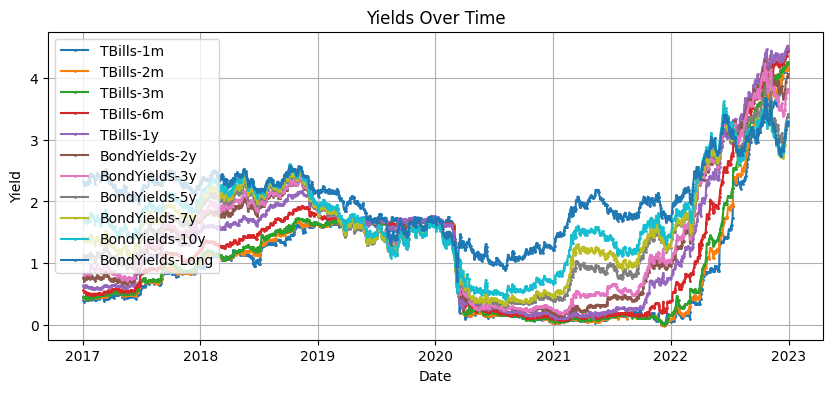

In [6]:
# Plotting each column (1m to long) vs Date for yields
plt.figure(figsize=(10, 4))
for col in df.columns[1:]:  # Skip 'Date' column
    plt.plot(df['Date'], df[col], marker='.',markersize=2, label=col)

plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Yields Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Extract the sheet of percentage changes in yields
df1 = pd.read_excel('Data.xlsx', sheet_name='DChanges')
df1['Date'] = pd.to_datetime(df['Date'])
print(df1.head()) # Print the first few rows of the DataFrame to verify import.

        Date  DeltaTBills-1m  DeltaTBills-2m  DeltaTBills-3m  DeltaTBills-6m  \
0 2017-01-03           -0.01           -0.01           -0.01           -0.01   
1 2017-01-04           -0.01            0.00           -0.01           -0.02   
2 2017-01-05            0.04           -0.01            0.00            0.01   
3 2017-01-06           -0.01           -0.01            0.01           -0.01   
4 2017-01-09            0.00            0.01            0.02            0.01   

   DeltaTBills-1y  DeltaBondYields-2y  DeltaBondYields-3y  DeltaBondYields-5y  \
0           -0.02               -0.02               -0.02               -0.03   
1           -0.01               -0.03               -0.03               -0.04   
2            0.02                0.04                0.03                0.05   
3           -0.01               -0.01               -0.01               -0.02   
4            0.03                0.00                0.00               -0.01   

   DeltaBondYields-7y  DeltaBond

In [8]:
# Get the number of rows and columns
print(df1.shape[0])
print(df1.shape[1])

1493
12


In [ ]:
# Specify the cutoff date
cutoff_date = pd.to_datetime('October 24, 2022')
df1_filtered = df1[df1['Date'] <= cutoff_date]   # Filter the DataFrame
print(df1_filtered.tail())   # Print or further process df_filtered

# Original dataset
print(f'Number of rows are: {df1.shape[0]}')
print(f'Number of columns are: {df1.shape[1]}')
# Filtered dataset
print(f'Number of rows are: {df1_filtered.shape[0]}')
print(f'Number of columns are: {df1_filtered.shape[1]}')

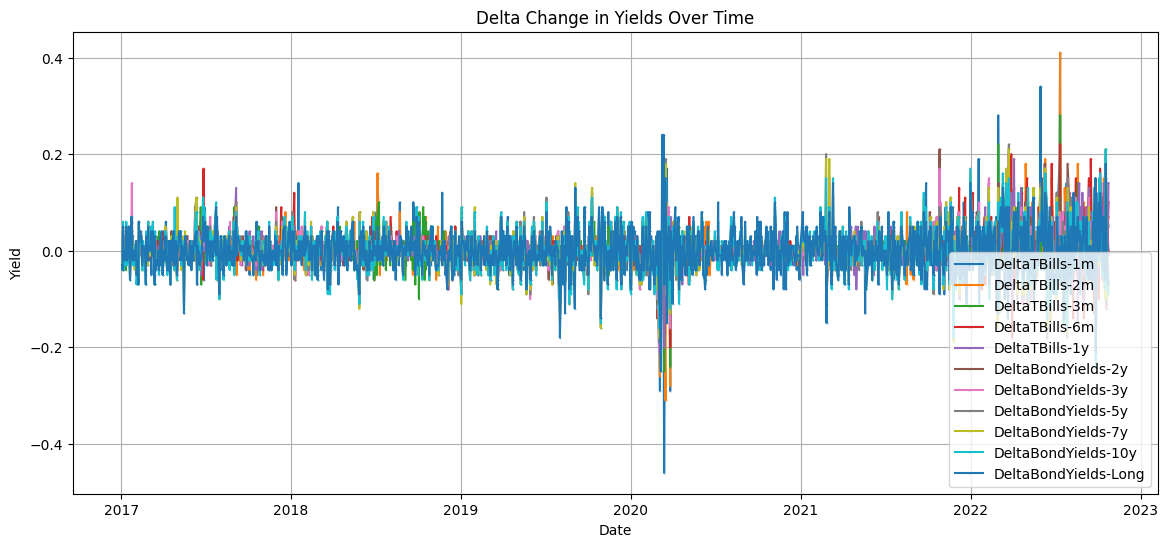

In [11]:
# Plotting each column (1m to long) vs Date
plt.figure(figsize=(14, 6))
for col in df1_filtered.columns[1:]:  # Skip 'Date' column
    plt.plot(df1_filtered['Date'], df1_filtered[col], marker='.',markersize=0.5, label=col)

plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Delta Change in Yields Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Testing stationarity
from statsmodels.tsa.stattools import adfuller

# Assuming your differenced series is stored in a column
# Example: df['10y_diff'] = df['10y_yield'].diff()
series = df1_filtered['DeltaBondYields-Long'].dropna()  # drop NaNs caused by .diff()

# Run ADF test
result = adfuller(series)

# Print results
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')

# Optional interpretation
if result[1] < 0.05:
    print("✅ The series is stationary (reject H₀ of unit root).")
else:
    print("❌ The series is non-stationary (fail to reject H₀).")


ADF Statistic: -36.9365
p-value: 0.0000
✅ The series is stationary (reject H₀ of unit root).


# PCA Analysis

In [13]:
# Run principal component analysis on the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical features for PCA
features = ['DeltaTBills-1m', 'DeltaTBills-2m','DeltaTBills-3m', 'DeltaTBills-1m','DeltaTBills-1y','DeltaBondYields-2y',
            'DeltaBondYields-3y','DeltaBondYields-5y','DeltaBondYields-7y','DeltaBondYields-10y','DeltaBondYields-Long']
x = df1_filtered.loc[:, features].values

# Normalize data using StandardScaler
x = StandardScaler().fit_transform(x)

In [14]:
# Find NaN values in the dataframe
nan_locations = np.where(np.isnan(x))

# Print the row and column indices where NaN values are located
print("NaN locations (row, column):")
for row, col in zip(*nan_locations):
    print(f"Row: {row}, Column: {col}")

NaN locations (row, column):


Text(0.5, 1.0, 'Explained Variance per Component')

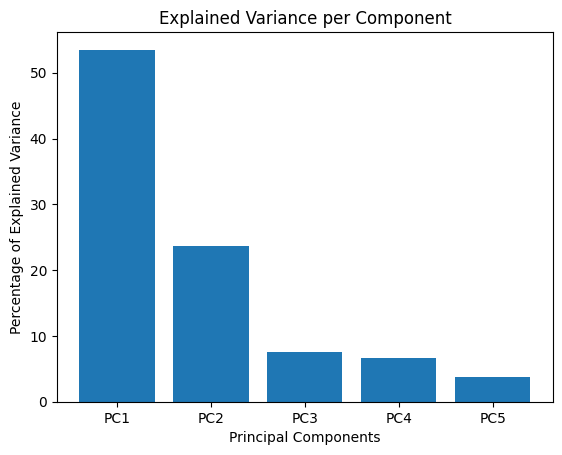

In [15]:
# Apply PCA with 5 components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
#plt.plot(x=range(1, len(per_var)+1), pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance per Component')

In [ ]:
print(pca.explained_variance_ratio_)

[0.53495848 0.23588001 0.07505081 0.06648139 0.03731761]


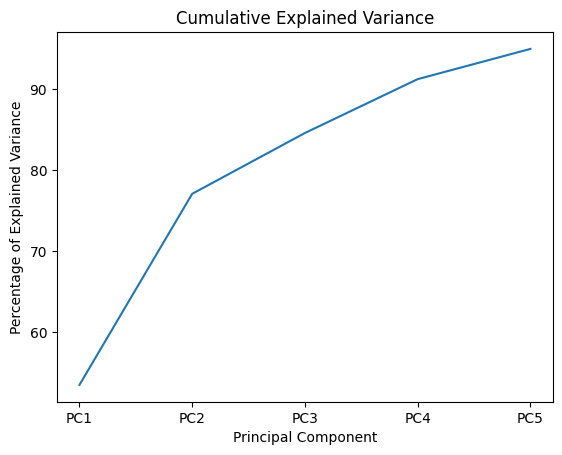

In [16]:
plt.plot(labels, pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Explained Variance');

In [17]:
# Extract the first three principal components
first_three_pcs = principalComponents[:, :3]
# Print or further process the extracted components
first_three_pcs

array([[-1.80493904, -0.30235218, -0.13394451],
       [-2.29802266,  0.07759918,  0.18738803],
       [ 2.68487502,  0.10479868, -1.35543668],
       ...,
       [-4.66393271,  1.56671764, -1.30093468],
       [-0.31502041,  4.33256438, -0.25652036],
       [-0.95396648,  2.72924353,  4.11982901]])

In [ ]:
# Create a DataFrame with dates and the first three principal components
df_pca10 = pd.DataFrame({'DeltaBondYields-10y': df1_filtered['DeltaBondYields-10y'],
                       'PC1': first_three_pcs[:, 0],
                       'PC2': first_three_pcs[:, 1],
                       'PC3': first_three_pcs[:, 2]})
print(df_pca10)

# Regressions to predict changes

# Use ARIMA

In [ ]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
#  !conda install -c conda-forge pmdarima -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    cython-3.0.12              |  py311ha3e34f5_0         3.6 MB  conda-forge
    joblib-1.4.2               |     pyhd8ed1ab_1         215 KB  conda-forge
    libblas-3.9.0              |31_h59b9bed_openblas          16 KB  conda-forge
    libcblas-3.9.0             |31_he106b2a_openblas          16 KB  conda-forge
    libgfortran-14.2.0         |       h69a702a_2          52 KB  conda-forge
    libgfortran5-14.2.0        |       hf

In [19]:
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima

In [20]:
print(df_pca10)

      DeltaBondYields-10y        PC1       PC2       PC3
0                   -0.03  -1.804939 -0.302352 -0.133945
1                   -0.04  -2.298023  0.077599  0.187388
2                    0.06   2.684875  0.104799 -1.355437
3                   -0.04  -1.308540 -0.061150  0.348737
4                    0.00  -0.071520  0.533529  0.831351
...                   ...        ...       ...       ...
1443                 0.21  11.867010  2.820217 -2.258853
1444                 0.11   7.598918  1.722672 -1.053355
1445                -0.06  -4.663933  1.566718 -1.300935
1446                -0.03  -0.315020  4.332564 -0.256520
1447                -0.09  -0.953966  2.729244  4.119829

[1448 rows x 4 columns]


In [21]:
# --- Step 1: Forecast PCA Components using auto_arima ---
pca_orders = {}
forecast_pcas = []

for col in ['PC1', 'PC2', 'PC3']:
    series = df_pca10[col]

    # Automatically select best ARIMA order
    model = auto_arima(
        series,
        seasonal=False,     # PCA is not seasonal
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        max_p=5, max_q=5,   # limit complexity
        max_order=None      # unrestricted if you want more flexibility
    )
     # Store or print the selected ARIMA order
    pca_orders[col] = model.order
    print(f"Best ARIMA order for {col}: {model.order}")

    # Forecast next 13 steps
    forecast = model.predict(n_periods=13)
    forecast_pcas.append(forecast)

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order for PC1: (2, 1, 2)


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order for PC2: (0, 1, 3)


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order for PC3: (3, 1, 1)


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [22]:
# Stack forecasts: shape (13 days, 3 PCA components)
pca_forecast_array = np.column_stack(forecast_pcas)

In [23]:
# --- Step 2: Train regression model to predict % change in 10Y yield ---
X = df_pca10[['PC1', 'PC2', 'PC3']]
y = df_pca10['DeltaBondYields-10y']
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [24]:
# --- Step 3: Predict % change in 10Y yield using predicted PCA values ---
yield_predictions = reg_model.predict(pca_forecast_array)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# --- Step 4: Combine results into DataFrame ---
results = pd.DataFrame({
    'Day': [f'Day {i+1}' for i in range(13)],
    'PC1': pca_forecast_array[:, 0],
    'PC2': pca_forecast_array[:, 1],
    'PC3': pca_forecast_array[:, 2],
    'Predicted Delta Change in 10Y Yield': yield_predictions
})

print(results)

       Day       PC1       PC2       PC3  Predicted Delta Change in 10Y Yield
0    Day 1  0.874252  1.825488 -0.354841                             0.005344
1    Day 2  0.941899  1.331115  0.057559                             0.007672
2    Day 3  0.974917  1.170028  0.535243                             0.006568
3    Day 4  0.950670  1.170028  0.249236                             0.007855
4    Day 5  0.972524  1.170028  0.272166                             0.008101
5    Day 6  0.953097  1.170028  0.310876                             0.007528
6    Day 7  0.970381  1.170028  0.291529                             0.007948
7    Day 8  0.955005  1.170028  0.292349                             0.007673
8    Day 9  0.968684  1.170028  0.295334                             0.007895
9   Day 10  0.956514  1.170028  0.294027                             0.007689
10  Day 11  0.967341  1.170028  0.294023                             0.007879
11  Day 12  0.957709  1.170028  0.294249                        

In [26]:
print(df1_filtered)


           Date  DeltaTBills-1m  DeltaTBills-2m  DeltaTBills-3m  \
0    2017-01-03           -0.01           -0.01           -0.01   
1    2017-01-04           -0.01            0.00           -0.01   
2    2017-01-05            0.04           -0.01            0.00   
3    2017-01-06           -0.01           -0.01            0.01   
4    2017-01-09            0.00            0.01            0.02   
...         ...             ...             ...             ...   
1443 2022-10-18            0.15            0.09            0.04   
1444 2022-10-19            0.09            0.04            0.04   
1445 2022-10-20            0.03            0.00           -0.04   
1446 2022-10-21            0.09            0.05            0.08   
1447 2022-10-24           -0.01            0.07            0.05   

      DeltaTBills-6m  DeltaTBills-1y  DeltaBondYields-2y  DeltaBondYields-3y  \
0              -0.01           -0.02               -0.02               -0.02   
1              -0.02           -0.0

In [28]:
# Ensure Date column is datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Define your start and end dates
start_date = pd.to_datetime('2022-10-24')
end_date = pd.to_datetime('2022-11-03')

# Filter the rows between those dates
filtered333_df = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)].copy()

# View result
print(filtered333_df)

           Date  DeltaTBills-1m  DeltaTBills-2m  DeltaTBills-3m  \
1447 2022-10-24           -0.01            0.07            0.05   
1448 2022-10-25           -0.08           -0.12           -0.15   
1449 2022-10-26           -0.12           -0.07           -0.03   
1450 2022-10-27           -0.03           -0.05            0.00   
1451 2022-10-28            0.01            0.08            0.10   
1452 2022-10-31            0.00            0.01           -0.02   
1453 2022-11-01           -0.01            0.00            0.01   
1454 2022-11-02           -0.02           -0.02            0.01   
1455 2022-11-03            0.00            0.06            0.01   

      DeltaTBills-6m  DeltaTBills-1y  DeltaBondYields-2y  DeltaBondYields-3y  \
1447            0.10            0.14                0.00               -0.01   
1448           -0.26           -0.26               -0.28               -0.28   
1449           -0.01           -0.05               -0.05               -0.05   
1450     

In [29]:
from datetime import timedelta
df1['Date'] = pd.to_datetime(df1['Date'])

# Define start and end date
start_date = pd.to_datetime('2022-10-25')
end_date = pd.to_datetime('2022-11-10')

# Filter rows between the dates (inclusive)
df1_subset = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)].copy()

# View the result
print(df1_subset)

           Date  DeltaTBills-1m  DeltaTBills-2m  DeltaTBills-3m  \
1448 2022-10-25           -0.08           -0.12           -0.15   
1449 2022-10-26           -0.12           -0.07           -0.03   
1450 2022-10-27           -0.03           -0.05            0.00   
1451 2022-10-28            0.01            0.08            0.10   
1452 2022-10-31            0.00            0.01           -0.02   
1453 2022-11-01           -0.01            0.00            0.01   
1454 2022-11-02           -0.02           -0.02            0.01   
1455 2022-11-03            0.00            0.06            0.01   
1456 2022-11-04            0.03           -0.02           -0.04   
1457 2022-11-07           -0.01            0.01            0.02   
1458 2022-11-08            0.01            0.04            0.03   
1459 2022-11-09           -0.06           -0.05           -0.07   
1460 2022-11-10            0.04           -0.01            0.10   

      DeltaTBills-6m  DeltaTBills-1y  DeltaBondYields-2y  Del

In [30]:
# Extract the columns
col1 = df1_subset['Date']
col2 = df1_subset['DeltaBondYields-10y']
col3 = results['Predicted Delta Change in 10Y Yield']

# Combine into a new DataFrame
combined_df = pd.DataFrame({
    'Date': col1.values,
    'DeltaBondYields-10y': col2.values,
    'Predicted Delta Change in 10Y Yield': col3.values
})

# Preview the result
print(combined_df)

         Date  DeltaBondYields-10y  Predicted Delta Change in 10Y Yield
0  2022-10-25                -0.20                             0.005344
1  2022-10-26                -0.09                             0.007672
2  2022-10-27                 0.04                             0.006568
3  2022-10-28                 0.04                             0.007855
4  2022-10-31                -0.02                             0.008101
5  2022-11-01                 0.07                             0.007528
6  2022-11-02                 0.09                             0.007948
7  2022-11-03                 0.10                             0.007673
8  2022-11-04                 0.10                             0.007895
9  2022-11-07                -0.13                             0.007689
10 2022-11-08                -0.08                             0.007879
11 2022-11-09                -0.26                             0.007709
12 2022-11-10                 0.02                             0

In [31]:
combined_df['Abnormal Return'] = combined_df['DeltaBondYields-10y'] - combined_df['Predicted Delta Change in 10Y Yield']

In [32]:
CAR = combined_df['Abnormal Return'].sum()
print(f"Cumulative Abnormal Return (CAR): {CAR:.4f}%")

Cumulative Abnormal Return (CAR): -0.4177%


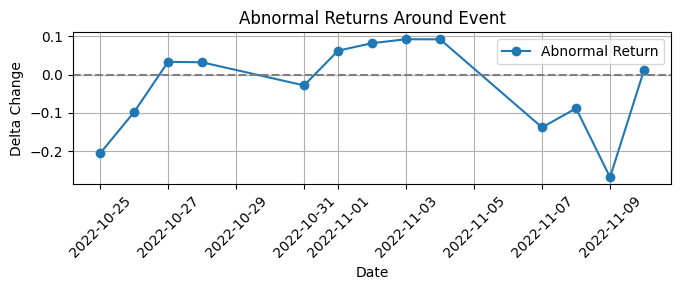

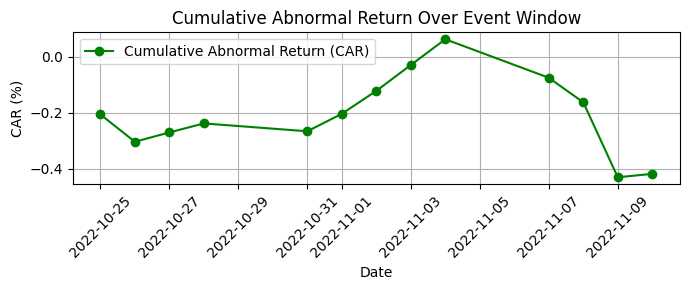

In [33]:
import matplotlib.pyplot as plt

# Plot Abnormal Returns
plt.figure(figsize=(7, 3))
plt.plot(combined_df['Date'], combined_df['Abnormal Return'], marker='o', label='Abnormal Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Abnormal Returns Around Event')
plt.xlabel('Date')
plt.ylabel('Delta Change')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Cumulative AR (CAR) plot
combined_df['CAR'] = combined_df['Abnormal Return'].cumsum()
plt.figure(figsize=(7, 3))
plt.plot(combined_df['Date'], combined_df['CAR'], marker='o', label='Cumulative Abnormal Return (CAR)', color='green')
plt.title('Cumulative Abnormal Return Over Event Window')
plt.xlabel('Date')
plt.ylabel('CAR (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(combined_df['Abnormal Return'], 0)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: -0.9810, p-value: 0.3460


In [41]:
combined_df1 = combined_df.iloc[5:-4].copy()

# View the result
print(combined_df1)

        Date  DeltaBondYields-10y  Predicted Delta Change in 10Y Yield  \
5 2022-11-01                 0.07                             0.007528   
6 2022-11-02                 0.09                             0.007948   
7 2022-11-03                 0.10                             0.007673   
8 2022-11-04                 0.10                             0.007895   

   Abnormal Return       CAR  
5         0.062472 -0.203068  
6         0.082052 -0.121016  
7         0.092327 -0.028689  
8         0.092105  0.063416  


In [42]:
t_stat, p_value = ttest_1samp(combined_df1['Abnormal Return'], 0)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: 11.7296, p-value: 0.0013


Make the results for 5 year bond

In [43]:
CAR = combined_df1['Abnormal Return'].sum()
print(f"Cumulative Abnormal Return (CAR): {CAR:.4f}%")

Cumulative Abnormal Return (CAR): 0.3290%


In [46]:
# Create a DataFrame with dates and the first three principal components
df_pca5 = pd.DataFrame({'DeltaBondYields-5y': df1_filtered['DeltaBondYields-5y'],
                       'PC1': first_three_pcs[:, 0],
                       'PC2': first_three_pcs[:, 1],
                       'PC3': first_three_pcs[:, 2]})
print(df_pca5)

      DeltaBondYields-5y        PC1       PC2       PC3
0                  -0.03  -1.804939 -0.302352 -0.133945
1                  -0.04  -2.298023  0.077599  0.187388
2                   0.05   2.684875  0.104799 -1.355437
3                  -0.02  -1.308540 -0.061150  0.348737
4                  -0.01  -0.071520  0.533529  0.831351
...                  ...        ...       ...       ...
1443                0.20  11.867010  2.820217 -2.258853
1444                0.13   7.598918  1.722672 -1.053355
1445               -0.11  -4.663933  1.566718 -1.300935
1446               -0.02  -0.315020  4.332564 -0.256520
1447               -0.05  -0.953966  2.729244  4.119829

[1448 rows x 4 columns]


In [47]:
# --- Step 2: Train regression model to predict % change in 10Y yield ---
X = df_pca5[['PC1', 'PC2', 'PC3']]
y = df_pca5['DeltaBondYields-5y']
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [48]:
# --- Step 3: Predict % change in 5Y yield using predicted PCA values ---
yield_predictions = reg_model.predict(pca_forecast_array)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
# --- Step 4: Combine results into DataFrame ---
results2 = pd.DataFrame({
    'Day': [f'Day {i+1}' for i in range(13)],
    'PC1': pca_forecast_array[:, 0],
    'PC2': pca_forecast_array[:, 1],
    'PC3': pca_forecast_array[:, 2],
    'Predicted Delta Change in 5Y Yield': yield_predictions
})

print(results2)

       Day       PC1       PC2       PC3  Predicted Delta Change in 5Y Yield
0    Day 1  0.874252  1.825488 -0.354841                            0.007078
1    Day 2  0.941899  1.331115  0.057559                            0.010197
2    Day 3  0.974917  1.170028  0.535243                            0.010606
3    Day 4  0.950670  1.170028  0.249236                            0.010849
4    Day 5  0.972524  1.170028  0.272166                            0.011176
5    Day 6  0.953097  1.170028  0.310876                            0.010748
6    Day 7  0.970381  1.170028  0.291529                            0.011093
7    Day 8  0.955005  1.170028  0.292349                            0.010824
8    Day 9  0.968684  1.170028  0.295334                            0.011055
9   Day 10  0.956514  1.170028  0.294027                            0.010846
10  Day 11  0.967341  1.170028  0.294023                            0.011035
11  Day 12  0.957709  1.170028  0.294249                            0.010867

In [ ]:
# Make a dataframe with predicted and Actual yields
print("Shape:", subset_df.shape)
print("Rows:", subset_df.shape[0])
print("Columns:", subset_df.shape[1])


In [53]:
col1 = df1_subset['Date']
col2 = df1_subset['DeltaBondYields-5y']
col3 = results2['Predicted Delta Change in 5Y Yield']

# Combine into a new DataFrame
combined_df = pd.DataFrame({
    'Date': col1.values,
    'DeltaBondYields-5y': col2.values,
    'Predicted 5y-Chng': col3.values
})

# Preview the result
print(combined_df)

         Date  DeltaBondYields-5y  Predicted 5y-Chng
0  2022-10-25               -0.25           0.007078
1  2022-10-26               -0.08           0.010197
2  2022-10-27                0.05           0.010606
3  2022-10-28                0.05           0.010849
4  2022-10-31                0.00           0.011176
5  2022-11-01                0.05           0.010748
6  2022-11-02                0.11           0.011093
7  2022-11-03                0.08           0.010824
8  2022-11-04                0.10           0.011055
9  2022-11-07               -0.10           0.010846
10 2022-11-08               -0.07           0.011035
11 2022-11-09               -0.29           0.010867
12 2022-11-10                0.02           0.011016


In [55]:
combined_df['Abnormal Return'] = combined_df['DeltaBondYields-5y'] - combined_df['Predicted 5y-Chng']

In [56]:
CAR = combined_df['Abnormal Return'].sum()
print(f"Cumulative Abnormal Return (CAR): {CAR:.4f}%")

Cumulative Abnormal Return (CAR): -0.4674%


In [62]:
combined_df1 = combined_df.iloc[6:-4].copy()

# View the result
print(combined_df1)

        Date  DeltaBondYields-5y  Predicted 5y-Chng  Abnormal Return
6 2022-11-02                0.11           0.011093         0.098907
7 2022-11-03                0.08           0.010824         0.069176
8 2022-11-04                0.10           0.011055         0.088945


In [63]:
t_stat, p_value = ttest_1samp(combined_df1['Abnormal Return'], 0)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: 9.8064, p-value: 0.0102


In [64]:
CAR = combined_df1['Abnormal Return'].sum()
print(f"Cumulative Abnormal Return (CAR): {CAR:.4f}%")

Cumulative Abnormal Return (CAR): 0.2570%
